# この課題の目的
スクラッチを通してニューラルネットワークの発展的内容を理解する
以下の要件をすべて満たしていた場合、合格とします。

※Jupyter Notebookを使い課題に沿った検証や説明ができている。

# スクラッチによる実装
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。
<br>
<br>前回作成した3層のニューラルネットワークを、クラスを活用することで、任意の構成に拡張しやすいコードに書き換えていきます。
<br>その上で、活性化関数や初期値、最適化手法について発展的なものを扱えるようにしていきます。
<br>
<br>このようなスクラッチを行うことで、今後各種フレームワークを利用していくにあたり、内部の動きが想像できることを目指します。
<br>
<br>新たなニューラルネットワーク分類器のクラスを作成する
<br>Sprint9で作成したものとは別に、ニューラルネットワーク分類器のクラスScratchDeepNeuralNetrowkClassifierを作成してください。
<br>
<br>層などのクラス化
<br>コーディング
<br>
<br>クラスにまとめて行くことで、構成を変更しやすい実装にしていきます。
<br>
<br>手を加える箇所
<br>
<br>層の数
<br>層の種類（今後は畳み込み層など他のタイプの層が登場する）
<br>活性化関数の種類
<br>重みやバイアスの初期化方法
<br>最適化手法
<br>そのために、全結合層、各種活性化関数、重みやバイアスの初期化、最適化手法それぞれのクラスを作成します。
<br>
<br>実装方法は自由ですが、簡単な例を紹介します。サンプルコード1のように全結合層と活性化関数のインスタンスを作成し、サンプルコード2,3のようにして使用する。それぞれのクラスについてはこのあと解説します。
<br>
<br>サンプルコード1
<br>
<br>（ScratchDeepNeuralNetrowkClassifierのfitメソッド内）

サンプルコード2
（イテレーションごとのフォワード）

サンプルコード3

（イテレーションごとのバックワード）

## 【問題1】全結合層のクラス化
コーディング

全結合層のクラスの雛形を載せました。コンストラクタで重みやバイアスの初期化をして、あとはフォワードとバックワードのメソッドを用意します。

重みW、バイアスB、およびフォワード時の入力Xをインスタンス変数として保持しておくことで、煩雑な入出力は不要になります。

なお、インスタンスも引数として渡すことができます。そのため、初期化方法のインスタンスinitializerをコンストラクタで受け取れば、それにより初期化が行われます。渡すインスタンスを変えれば、初期化方法が変えられます。

また、引数として自身のインスタンスselfを渡すこともできます。これを利用してself = self.optimizer.update(self)という風に層の重みの更新が可能です。更新に必要な値は複数ありますが、全て全結合層が持つインスタンス変数にすることができます。

初期化方法と最適化手法のクラスについては後述します。

雛形

In [10]:
import numpy as np
# from copy import deepcopy

class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        self.Z = 0
        self.dA = 0

    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        A = np.dot(X, self.W) + self.B
        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        dW = np.dot(self.Z.T, dA)
        dZ = np.dot(dA, self.W.T) 
        # 更新
        self = self.optimizer.update(self)
        
        return dZ

## 【問題2】初期化方法のクラス化
前述のように、全結合層のコンストラクタに初期化方法のインスタンスを渡せるようにします。雛形に必要なコードを書き加えていってください。標準偏差の値（sigma）はコンストラクタで受け取るようにすることで、全結合層のクラス内にこの値（sigma）を渡さなくてすむようになります。

これまで扱ってきた初期化方法はSimpleInitializerクラスと名付けることにします。

雛形

In [11]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    
    def __init__(self, sigma=0.01):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W : 次の形のndarray, shape(n_nodes1, n_nodes2)
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W.astype("f")
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B : 次の形のndarray, shape(1, nodes2)
        """
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B.astype("f")
    
class XavierInitializer:
    """
    Xavierによる初期化
    Sigmoid」かTanhに向いている
    """
    
    def __init__(self):
        self.sigma = None
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W : 次の形のndarray, shape(n_nodes1, n_nodes2)
        """
        self.sigma = 1 / np.sqrt(n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W.astype("f")
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B : 次の形のndarray, shape(1, nodes2)
        """
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B.astype("f")
    
class HeInitializer:
    """
    Heによる初期化
    ReLUと相性がいい
    """
    
    def __init__(self):
        self.sigma = 0
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W : 次の形のndarray, shape(n_nodes1, n_nodes2)
        """
        self.sigma = np.sqrt(2 / n_nodes1)
        W = (self.sigma * np.random.randn(n_nodes1, n_nodes2))
        return W.astype("f")
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B : 次の形のndarray, shape(1, nodes2)
        """
        B = self.sigma * np.random.randn(1, n_nodes2)
        return B.astype("f")

## 【問題3】最適化手法のクラス化
最適化手法に関しても初期化方法同様に全結合層にインスタンスとして渡します。バックワードのときにself = self.optimizer.update(self)のように更新できるようにします。こちらも雛形を用意しましたので、必要なコードを書き加えていってください。

これまで扱ってきた最適化手法はSGDクラス（Stochastic Gradient Descent、確率的勾配降下法）として作成します。

雛形

In [12]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス

        Returns
        ----------
        layer : 更新後の層のインスタンス
        """
        layer.W[...] = layer.W - self.lr * np.dot(layer.Z.T, layer.dA) / len(layer.dA)
        layer.B[...] = layer.B - self.lr * np.mean(layer.dA, axis=0)
        return layer

class AdaGrad:
    """
    学習率を変化を減少させていく勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        self.HW = 0
        self.HB = 0
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス

        Returns
        ----------
        layer : 更新後の層のインスタンス
        """
        
        dW = np.dot(layer.Z.T, layer.dA) / len(layer.dA)
        dB = np.mean(layer.dA, axis=0)
        self.HW += dW**2
        self.HB +=  dB**2
        layer.W[...] = layer.W - self.lr / np.sqrt(self.HW +1e-7) * dW #0で割るとまずいので +le-7
        layer.B[...] = layer.B - self.lr / np.sqrt(self.HB + 1e-7)  * dB
        return layer
    
class Momentum:
    
    """
    momentumSGD
    Parameters
    ----------
    lr : 学習率
    momentum : 学習係数
    """
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.vW = 0
        self.vB = 0
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス

        Returns
        ----------
        layer : 更新後の層のインスタンス
        """

        dW = np.dot(layer.Z.T, layer.dA) / len(layer.dA)
        dB = np.mean(layer.dA, axis=0)
        
        self.vW = self.momentum * self.vW - self.lr * dW
        self.vB =  self.momentum * self.vB - self.lr * dB
        
        layer.W[...] = layer.W + self.vW
        layer.B[...] = layer.B + self.vB
        
        return layer
    
class Adam:

    """
    Adam
    RMSprop に Momentum 法を組み合わせたような形
    Parameters
    ----------
    lr : 学習率
    momentum : 学習係数
    beta1
    beta2
    """

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.mW = 0
        self.vW = 0
        self.mB = 0
        self.vB = 0
        
    def update(self, layer):
        
        self.iter += 1
        dW = np.dot(layer.Z.T, layer.dA) / len(layer.dA)
        dB = np.mean(layer.dA, axis=0)
        
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter) 
        
        self.mW += (1 - self.beta1) * (dW - self.mW)
        self.vW += (1 - self.beta2) * (dW**2 - self.vW)
        self.mB += (1 - self.beta1) * (dB - self.mB)
        self.vB += (1 - self.beta2) * (dB**2 - self.vB)
        
        layer.W -= lr_t * self.mW / (np.sqrt(self.vW) + 1e-7)
        layer.B -= lr_t * self.mB / (np.sqrt(self.vB) + 1e-7)

## 【問題4】活性化関数のクラス化
活性化関数もクラス化を行なってください。

上記サンプルコード3ではソフトマックス関数のバックプロパゲーションに交差エントロピー誤差の計算も含む実装を想定しています。

## 【問題5】ReLUクラスの作成
現在一般的に使われている活性化関数であるReLU（Rectified Linear Unit）をReLUクラスとして実装します。

ReLUは以下の数式です。

In [13]:
class sigmoid:
    """
    シグモイド関数
    """
    
    def __init__(self):
        self.Z = 0
    
    def forward(self, A):
        """
        フォワード
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes)
            出力
        """ 
        Z = 1 / (1 + np.exp(-A))
        self.Z = Z
        return Z
    
    def backward(self, dZ):
        """
        バックワード
        Parameters
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes)
            後ろから流れてきた勾配
        Returns
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes)
            前に流す勾配
        """
        dA = dZ  *  (1 - self.Z) * self.Z 
        return dA
    
class Tanh:
    """
    ハイパボリックタンジェント関数
    """
    
    def __init__(self):
        self.Z = 0
    
    def forward(self, A):
        """
        フォワード
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes)
            出力
        """ 
        Z = np.tanh(A)
        self.Z = Z
        return Z
    
    def backward(self, dZ):
        """
        バックワード
        Parameters
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes)
            後ろから流れてきた勾配
        Returns
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes)
            前に流す勾配
        """
        dA = dZ  *  (1 - self.Z**2)
        return dA

class Softmax:
    """
    ソフトマックス関数
    """
    
    def __init__(self):
        self.Z = 0
    
    def forward(self, A):
        """
        フォワード
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes)
            出力
        """ 
        
        c = np.max(A)
        A = A - c
        ex = np.exp(A)
        Z = ex / (np.sum(ex, axis=1))[:, np.newaxis]
        self.Z = Z
        return Z
    
    def backward(self, y):
        """
        バックワード
        Parameters
        ----------
        y : 次の形のndarray, shape (batch_size, n_class)
            正解ラベル
        Returns
        ----------
        dA : 次の形のndarray, shape (batch_size, n_class)
            前に流す勾配
        """
        
        dA = self.Z - y
        
        return dA
    
class ReLU:
    """
    ReLU関数
    """
    
    def __init__(self):
        self.Z = None
    
    def forward(self, A):
        """
        フォワード
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes)
            出力
        """ 
        Z = np.maximum(0, A)
        self.Z = deepcopy(Z)
        return Z
    
    def backward(self, dZ):
        """
        バックワード
        Parameters
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes)
            後ろから流れてきた勾配
        Returns
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes)
            前に流す勾配
        """
        
        dA = dZ  *  np.where(self.Z != 0, 1, self.Z)
        
        return dA

In [14]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop
    
    #Pythonの特殊メソッドのひとつで、オブジェクトに角括弧でアクセスしたときの挙動を定義できる。
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

class ScratchDeepNeuralNetrowkClassifier2:
    """
    """
    
    def __init__(self, n_features, batch_size=50, epoch=10, verbose=True, metrics="acc", n_output=10):
        self.n_nodes = [n_features]
        self.n_output = n_output
        self.batch_size = batch_size
        self.epoch = epoch
        self.metrics = metrics
        self.verbose = verbose
        self.train_loss = []
        self.val_loss = []
        self.layers = []

    
    def add(self, layer_type, n_nodes=None, Initializer=None, optimizer=None):
        
        if layer_type == "FC":
            self.layers += [FC(self.n_nodes[-1], n_nodes, Initializer, optimizer)]
            self.n_nodes += [n_nodes]
            
        elif layer_type == "ReLU":
            self.layers += [ReLU()]
        
        elif layer_type == "Tanh":
            self.layers += [Tanh()]
        
        elif layer_type == "sigmoid":
            self.layers += [sigmoid()]
            
        elif layer_type == "Softmax":
            self.layers += [Softmax()]
        else:
            print("layer_typeが存在しません")
            
    def fit(self, X, y, X_val=None, y_val=None, epoch=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        epoch : int
            エポック数変えたいときは入れてください
        """
        if epoch:
            self.epoch = epoch
        
        for i in range(self.epoch):

            #バッチ作成
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=56)

            for mini_X_train, mini_y_train in get_mini_batch:
                
                #FP
                self.FP(mini_X_train)

                #BP
                self.BP(mini_y_train)
                
            #評価値等の表示
            train_pred = self.FP(X)
            self.train_loss += [self._cross_entropy_loss(train_pred, y)]
            
            if np.any(X_val):
                val_pred = self.FP(X_val)
                self.val_loss += [self._cross_entropy_loss(val_pred, y_val)]
                
                #metricsを判定
                if  self.metrics == "acc":
                    met = self.accuracy(np.argmax(y_val, axis=1), np.argmax(val_pred, axis=1))
                else:
                    print("metricsの入力が間違っています")
                      
                if self.verbose:
                    print("epoch:{0} train_loss: {1} val_loss: {2} {3}: {4}".format(i+1, self.train_loss[i], self.val_loss[i], self.metrics, met))
                    
            else:
                if self.verbose:
                      print("epoch:{0} loss: {1}".format(i+1, self.train_loss[i]))
     
    def FP(self, X):
        for layer in self.layers:
            X = layer.forward(X)
            
        return X
            
    def BP(self, y):
        for layer in reversed(self.layers):
            y = layer.backward(y)
    
    def predict(self, X):
        hx = self.FP(X)
        return np.argmax(hx, axis=1)
            
    def _cross_entropy_loss(self,z, y):
        z += 1e-7
        return - sum(sum(y * np.log(z))) / len(y)
    
    def accuracy(self, y, y_pred):
        # accuracyを計算して返す
        return accuracy_score(y, y_pred)
    
    def plot_learning_curve(self):
        """
        学習曲線をプロットします。

        loss : array
        一回ごとの勾配降下方のロスのログ(train)
         val_los : array
        一回ごとの勾配降下方のロスのログ(val or test)
        """
        plt.figure(figsize=(8, 5))
        plt.title("model_loss")
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.plot(self.train_loss, label="train_loss")
        plt.plot(self.val_loss, label="val_loss")
        #plt.yscale("log")
        plt.legend()

In [19]:
#データのロード
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#フラットにする
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)
#スケール合わせ
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255.0
X_test /= 255.0
#onehot
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
#sprit train and val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)


In [20]:
n = X_train.shape[1]
model2 = ScratchDeepNeuralNetrowkClassifier2(n_features=n, batch_size=50, epoch=30, verbose=True)

In [21]:
model2.add("FC", 400, XavierInitializer(), Momentum(0.01, 0.9))
model2.add("Tanh")
model2.add("FC", 400, XavierInitializer(), Momentum(0.01, 0.9))
model2.add("Tanh")
model2.add("FC", 400, XavierInitializer(), Momentum(0.01, 0.9))
model2.add("Tanh")
model2.add("FC", 200, XavierInitializer(), Momentum(0.01, 0.9))
model2.add("Tanh")
model2.add("FC", 200, XavierInitializer(), Momentum(0.01, 0.9))
model2.add("Tanh")
model2.add("FC", 100, XavierInitializer(), Momentum(0.01, 0.9))
model2.add("Tanh")
model2.add("FC", 100, XavierInitializer(), Momentum(0.01, 0.9))
model2.add("Tanh")
model2.add("FC", 10, XavierInitializer(), Momentum(0.01, 0.9))
model2.add("Softmax")

In [22]:
model2.layers

In [23]:
model2.fit(X_train.astype("f"), y_train.astype("f"), X_val, y_val)

epoch:1 train_loss: 0.20820498784383137 val_loss: 0.22463523680295755 acc: 0.9295
epoch:2 train_loss: 0.14884129969278972 val_loss: 0.1736463588327181 acc: 0.945
epoch:3 train_loss: 0.11964422861735026 val_loss: 0.15098146858461717 acc: 0.9536666666666667
epoch:4 train_loss: 0.08866626675923665 val_loss: 0.12896868401128955 acc: 0.96075
epoch:5 train_loss: 0.060417942682902015 val_loss: 0.10748299463573407 acc: 0.9674166666666667
epoch:6 train_loss: 0.0471596934000651 val_loss: 0.10104424654121584 acc: 0.96975
epoch:7 train_loss: 0.038780804793039955 val_loss: 0.10050664700712995 acc: 0.97075
epoch:8 train_loss: 0.03151711924870809 val_loss: 0.10112524872435787 acc: 0.9706666666666667
epoch:9 train_loss: 0.027025304238001504 val_loss: 0.09959751397859634 acc: 0.972
epoch:10 train_loss: 0.02826255456606547 val_loss: 0.10254873690688665 acc: 0.9721666666666666
epoch:11 train_loss: 0.018454437494277953 val_loss: 0.09895568060977636 acc: 0.9726666666666667
epoch:12 train_loss: 0.0318080710

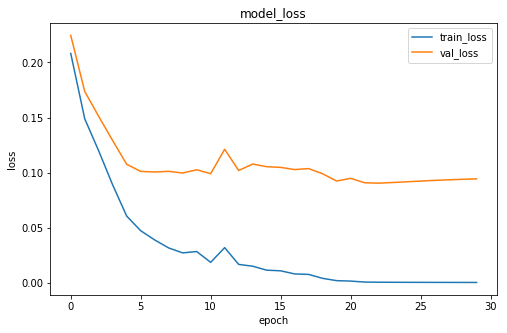

In [24]:
#勾配降下をMomentamで行った
#収束が早い、　エポックが進んでもval_lossが上がっていかない
model2.plot_learning_curve()

In [25]:
model3 = ScratchDeepNeuralNetrowkClassifier2(n_features=n, batch_size=50, epoch=10, verbose=True)

In [26]:
model3.add("FC", 400, XavierInitializer(), Adam(lr=0.001, beta1=0.9, beta2=0.99))
model3.add("Tanh")
model3.add("FC", 400, XavierInitializer(), Adam(lr=0.001, beta1=0.9, beta2=0.99))
model3.add("Tanh")
model3.add("FC", 400, XavierInitializer(), Adam(lr=0.001, beta1=0.9, beta2=0.99))
model3.add("Tanh")
model3.add("FC", 200, XavierInitializer(), Adam(lr=0.001, beta1=0.9, beta2=0.99))
model3.add("Tanh")
model3.add("FC", 200, XavierInitializer(), Adam(lr=0.001, beta1=0.9, beta2=0.99))
model3.add("Tanh")
model3.add("FC", 100, XavierInitializer(), Adam(lr=0.001, beta1=0.9, beta2=0.99))
model3.add("Tanh")
model3.add("FC", 100, XavierInitializer(), Adam(lr=0.001, beta1=0.9, beta2=0.99))
model3.add("Tanh")
model3.add("FC", 10, XavierInitializer(), Adam(lr=0.001, beta1=0.9, beta2=0.99))
model3.add("Softmax")

In [27]:
model3.fit(X_train.astype("f"), y_train.astype("f"), X_val, y_val)

epoch:1 train_loss: 0.23125979614257813 val_loss: 0.2634310673893705 acc: 0.9190833333333334
epoch:2 train_loss: 0.15714628410339354 val_loss: 0.1882289198963691 acc: 0.94625
epoch:3 train_loss: 0.13522624206542969 val_loss: 0.17486690625452683 acc: 0.949
epoch:4 train_loss: 0.08293899631500244 val_loss: 0.1316059096938763 acc: 0.9626666666666667
epoch:5 train_loss: 0.0821979112625122 val_loss: 0.1334502067909292 acc: 0.9638333333333333
epoch:6 train_loss: 0.08392953523000081 val_loss: 0.14164780709757455 acc: 0.9621666666666666
epoch:7 train_loss: 0.08597327645619711 val_loss: 0.14137113490086228 acc: 0.9616666666666667
epoch:8 train_loss: 0.0482332862218221 val_loss: 0.11416554819620318 acc: 0.97025
epoch:9 train_loss: 0.03653370602925619 val_loss: 0.10235596891519883 acc: 0.97325
epoch:10 train_loss: 0.04595148913065592 val_loss: 0.11757321348021776 acc: 0.9703333333333334


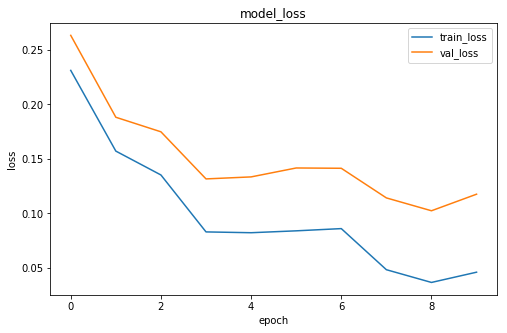

In [28]:
#勾配降下をadamで行った
#学習率高い(0.01)と収束しなかった。収束早い。beta2を下げると学習が進んだ時の学習率が低下？
model3.plot_learning_curve()

In [30]:
#テストのaccracy
test_pred = model3.predict(X_test)
model3.accuracy(y_test, test_pred)

0.9688

## 【問題6】重みの初期値
ここまでは重みやバイアスの初期値は単純にガウス分布で、標準偏差をハイパーパラメータとして扱ってきました。しかし、一般的に良い初期値の取り方が知られています。

シグモイド関数やハイパボリックタンジェント関数のときはXavierの初期値（またはGlorotの初期値）、ReLUのときはHeの初期値が使われます。

XavierInitializerクラスと、HeInitializerクラスを作成します。

それぞれの初期化方法における 
σ
 は次の式で求められます。

## 【問題7】最適化手法
コーディング

学習率は学習の良し悪しにとって重要なハイパーパラメータであり、これを学習過程で変化させていく方法が現在では一般的です。様々な手法が提案されていますが、今回はその中でも基本的な、AdaGradを実装します。

まず、これまで使ってきたSGDを確認します。

